# Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository.](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [2]:
codecamp = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

C:\Users\osval\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Let's explore the dataset:

In [3]:
codecamp.shape

(18175, 136)

In [4]:
codecamp.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
codecamp.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [6]:
interests = codecamp['JobRoleInterest'].value_counts(normalize=True) * 100
interests

Full-Stack Web Developer                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                 6.435927
  Data Scientist                                                                                                                          2.173913
Back-End Web Developer                                                                                                                    2.030892
  Mobile Developer                                                                                                                        1.673341
                                                                                                                                           ...    
Game Developer, Information Security,   Data Scientist, Data Engineer                                                 

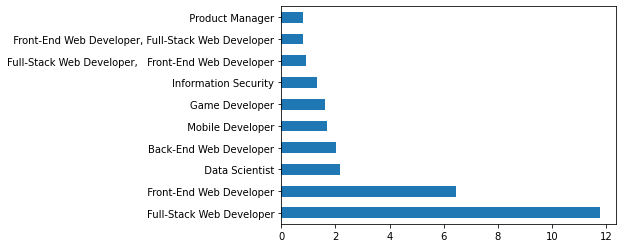

In [7]:
interests[0:10].plot.barh()

We can see there are people we can aim to, but there are some who are interested in more than one subject. Let's how much of the population is interested in more than one subject:

In [8]:
two_or_more = codecamp['JobRoleInterest'].dropna().str.split(',')

In [9]:
count = two_or_more.apply(lambda x: len(x))

In [10]:
count.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

We aim to people interested in either Mobile or Web development. Let's see how many people are interested in those.

In [11]:
web_or_mobile = codecamp['JobRoleInterest'].dropna().str.contains("Web Developer|Mobile Developer")
how_many = web_or_mobile.value_counts(normalize=True) * 100
how_many

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

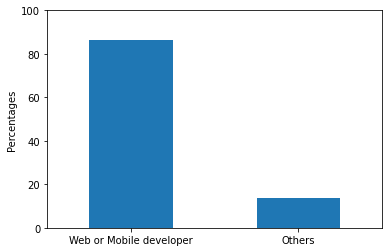

In [12]:
how_many.plot.bar()
plt.ylabel('Percentages')
plt.ylim(0,100)
plt.xticks([0,1], ['Web or Mobile developer', 'Others'], rotation=0)
plt.show()

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [13]:
by_country = codecamp[codecamp['JobRoleInterest'].notnull()].copy()

In [14]:
absolute_freq = by_country['CountryLive'].value_counts()
relative_freq = by_country['CountryLive'].value_counts(normalize=True) * 100

markets = pd.DataFrame({'Absolute Frequency': absolute_freq, 'Percentages': relative_freq})
markets

,Absolute Frequency,Percentages
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Papua New Guinea,1,0.014624
Panama,1,0.014624
Channel Islands,1,0.014624
Guadeloupe,1,0.014624


Even though this is useful information we can get more information.

The *MoneyForLearning* column, provides information about how mucho money (USD) people have spent from the moment they started coding. Since we are going to sell monthly subscription, we need to investigate how much money students spends per month. We will use information only from the top four countries in or frequency table, since they represent more than the 50 % of our dataset.

PD: Some students answered they have been learning to code for 0 months. This might be because the just started, and replacing values of 0 with 1 will work for us.

In [15]:
by_country['MonthsProgramming'].replace(0, 1, inplace=True)

In [16]:
by_country['money_per_month'] = by_country['MoneyForLearning'] /by_country['MonthsProgramming']
by_country['money_per_month']

1           13.333333
2          200.000000
3            0.000000
4            0.000000
6            0.000000
             ...     
18161        0.000000
18162        0.000000
18163             NaN
18171    10000.000000
18174             NaN
Name: money_per_month, Length: 6992, dtype: float64

There are some null values in both *CountryLive* and *money_per_month* columns. We have to drop those values.

In [17]:
by_country = by_country[by_country['money_per_month'].notnull()]
by_country = by_country[by_country['CountryLive'].notnull()]
by_country['CountryLive'].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

Let's check how much money a student spends on average each month in top four countries.

In [18]:
country_money_mean = by_country.groupby('CountryLive').mean()

In [19]:
country_money_mean['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

There are difference in the mean money spent by month. There should be some outliers in the dataset. We can use a boxplot in order to visualize the presence of outliers.

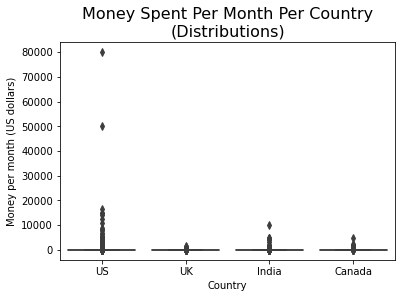

In [20]:
import seaborn as sns

top_countries = by_country[by_country['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(y='money_per_month', x='CountryLive', data = top_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

We need to handle outliers. Let's start droping rows where student spend more than 10000 USD per month, wich seems unrealistic.

In [21]:
by_country = by_country[by_country['money_per_month'] < 10000]

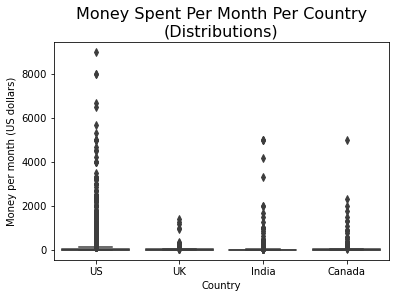

In [22]:
top_countries = by_country[by_country['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(y='money_per_month', x='CountryLive', data = top_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

There are still a lot of outlieres. Let's start with India. 

In [23]:
india_out = top_countries[(top_countries['CountryLive'] == 'India') & (top_countries['money_per_month'] >= 2500)]

In [24]:
top_countries = top_countries.drop(india_out.index)

There are also outliers in USA, we can make a similar process with USA, but using a higher limit.

In [25]:
usa_out = top_countries[(top_countries['CountryLive'] == 'United States of America') & (top_countries['money_per_month'] >= 6000)]
top_countries = top_countries.drop(usa_out.index)
                        

There's also people who just started a bootcamp, is probable that they spent some money and have a few months in *MonthsProgramming*. We can drop those too.

In [26]:
bootcamp = top_countries[(top_countries['CountryLive'] == 'United States of America') & (top_countries['money_per_month'] >= 6000) & (top_countries['AttendedBootcamp'] == 0)]
top_countries = top_countries.drop(bootcamp.index)

Also, starters in programming with high money per month spent have to be dropped.

In [27]:
starters = top_countries[(top_countries['CountryLive'] == 'United States of America') & (top_countries['money_per_month'] >= 6000) & (top_countries['MonthsProgramming'] <= 3)]
top_countries = top_countries.drop(starters.index)

Let's drop Canada outliers.

In [28]:
canada_out = top_countries[(top_countries['CountryLive'] == 'Canada') & (top_countries['money_per_month'] > 4500)]
top_countries = top_countries.drop(canada_out.index)

In [29]:
top_countries.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

These values make more sense! Let's now see percentages for country:

In [30]:
top_countries['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

US is the best market to advertise in!